# Hypotheses 2 and 3

In this notebook, we will test the following hypotheses:

1. Pull requests are reviewed and merged faster by an integrator from the same country.

2. Pull requests to repositories with teams of many nationalities are merged faster.

Let's import the packages and the data we need to test these hypotheses.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal, kendalltau
from cliffs_delta import cliffs_delta

We will once again use the dataset that is generated by `exploratory.ipynb`.

In [45]:
merged_data = pd.read_csv('./data/merged_data.csv', header=0)
merged_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num,log_mergetime_minutes,log_lifetime_minutes
0,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,0,0,0.0,0,0.000459,0,627,0,6.442540,6.442540
1,60,22091370,kubernetes,kubernetes,1,2760,2760.0,1,10,75,...,3,0,0.0,1,0.021057,0,2760,0,7.923348,7.923348
2,93,1486,ansible,ansible,1,4971,4971.0,4,14,0,...,6,2,64.0,0,0.000088,0,4971,0,8.511577,8.511577
3,101,5219,scikit-learn,scikit-learn,1,4040,4040.0,4,4,92,...,3,1,3.0,0,0.109291,0,4040,0,8.304247,8.304247
4,119,3905191,facebook,react,1,3609,3609.0,1,5,0,...,0,0,91.0,0,0.000000,0,3609,0,8.191463,8.191463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67652,3347524,1486,ansible,ansible,1,100,100.0,1,4,0,...,0,0,3.0,0,0.010687,0,100,0,4.615121,4.615121
67653,3347645,1486,ansible,ansible,1,487,487.0,2,8,0,...,0,0,67.0,0,0.008142,0,487,0,6.190315,6.190315
67654,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,17,3,7.0,0,0.000274,1,10204,1,11.059299,11.059299
67655,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,0,0,197.0,0,0.012812,0,11373,0,9.339085,9.339085


# Hypothesis 2

First let's see if pull requests are reviewed and merged faster by an integrator from the same country.

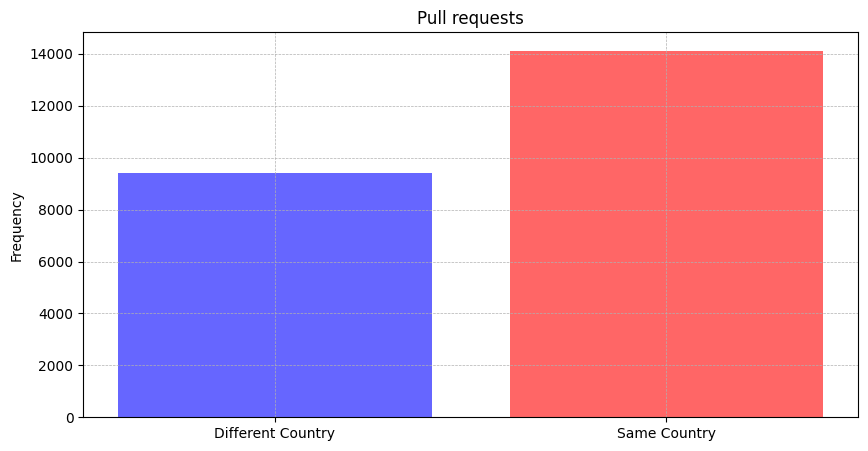

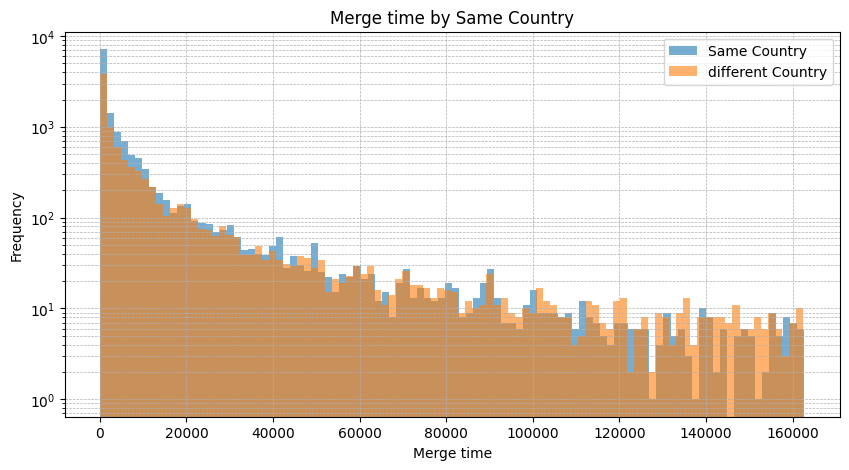

Shapiro-Wilk test for same country, mergetime: W = 0.8657745637683992, p = 0.28360700948807915
Shapiro-Wilk test for different country, mergetime: W = 0.9844910281935548, p = 0.7615365095478919
Kruskal-Wallis H test, mergetime: H = 348.3136455345087, p = 9.871193825956115e-78
Cliff's delta for mergetime: delta = -0.1433163737321987, p = negligible
Mean merge time for same country: 9906.223685141927
Mean merge time for different country: 14610.456600169779
Median merge time for same country: 1574.0
Median merge time for different country: 3004.0
Standard deviation of merge time for same country: 21893.484136404033
Standard deviation of merge time for different country: 27824.799727907262
Maximum merge time for same country: 162737.0
Maximum merge time for different country: 162362.0
Minimum merge time for same country: 16.0
Minimum merge time for different country: 16.0


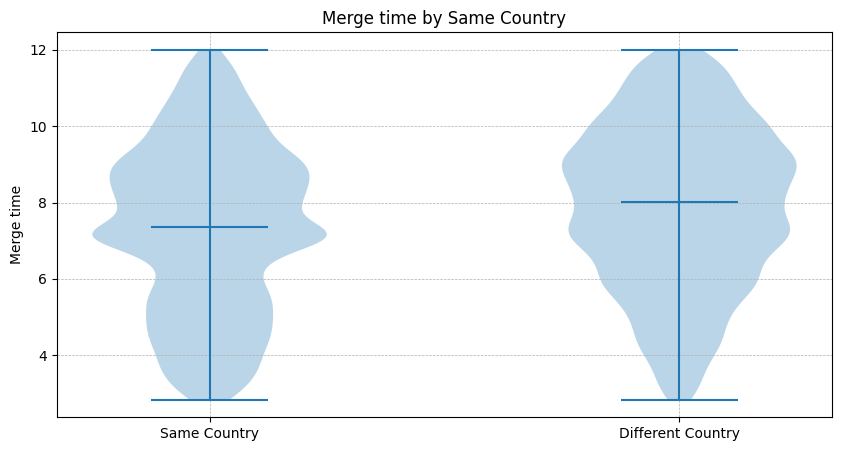

In [46]:
same_country = merged_data['same_country'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(same_country.index, same_country.values, alpha=0.6, color=['blue', 'red'])
plt.xticks(same_country.index, ['Different Country', 'Same Country'])
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests')
plt.show()


same_country = merged_data[merged_data['same_country'] == 1]
diff_country = merged_data[merged_data['same_country'] == 0]

plt.figure(figsize=(10, 5))
plt.hist(same_country['mergetime_minutes'], bins=100, alpha=0.6, label='Same Country', log=True)
plt.hist(diff_country['mergetime_minutes'], bins=100, alpha=0.6, label='different Country', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by Same Country')
plt.show()


same_country_sample = same_country['mergetime_minutes'].sample(n=3, random_state=1)
diff_country_sample = diff_country['mergetime_minutes'].sample(n=3,random_state=1)

res_same_country = shapiro(same_country_sample)
res_diff_country = shapiro(diff_country_sample)
print('Shapiro-Wilk test for same country, mergetime: W = {}, p = {}'.format(res_same_country.statistic, res_same_country.pvalue))
print('Shapiro-Wilk test for different country, mergetime: W = {}, p = {}'.format(res_diff_country.statistic, res_diff_country.pvalue))

H, p = kruskal(same_country['mergetime_minutes'], diff_country['mergetime_minutes'])
print('Kruskal-Wallis H test, mergetime: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_country['mergetime_minutes'], diff_country['mergetime_minutes'])
    print('Cliff\'s delta for mergetime: delta = {}, p = {}'.format(delta, res))

print('Mean merge time for same country: {}'.format(same_country['mergetime_minutes'].mean()))
print('Mean merge time for different country: {}'.format(diff_country['mergetime_minutes'].mean()))
print('Median merge time for same country: {}'.format(same_country['mergetime_minutes'].median()))
print('Median merge time for different country: {}'.format(diff_country['mergetime_minutes'].median()))
print('Standard deviation of merge time for same country: {}'.format(same_country['mergetime_minutes'].std()))
print('Standard deviation of merge time for different country: {}'.format(diff_country['mergetime_minutes'].std()))
print('Maximum merge time for same country: {}'.format(same_country['mergetime_minutes'].max()))
print('Maximum merge time for different country: {}'.format(diff_country['mergetime_minutes'].max()))
print('Minimum merge time for same country: {}'.format(same_country['mergetime_minutes'].min()))
print('Minimum merge time for different country: {}'.format(diff_country['mergetime_minutes'].min()))

plt.figure(figsize=(10, 5))
plt.violinplot([same_country['log_mergetime_minutes'], diff_country['log_mergetime_minutes']], showmedians=True)
plt.xticks([1, 2], ['Same Country', 'Different Country'])
plt.ylabel('Merge time')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by Same Country')
plt.show()

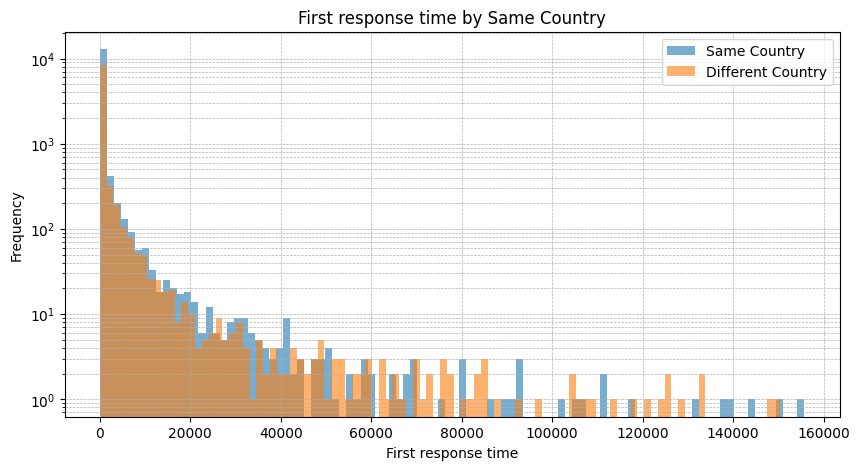

Shapiro-Wilk test for same country, first response: W = 0.7500000000000002, p = 7.771561172376096e-16
Shapiro-Wilk test for different country, first response: W = 0.923076923076923, p = 0.46326287493379903
Kruskal-Wallis H test, first response: H = 46.4532871806966, p = 9.38288181183795e-12
Cliff's delta for first response: delta = 0.052202338524298675, p = negligible
Mean first response time for same country: 1072.091951582077
Mean first response time for different country: 1468.643039049236
Median first response time for same country: 23.0
Median first response time for different country: 15.0
Standard deviation of first response time for same country: 5954.447371530162
Standard deviation of first response time for different country: 7790.060831834552
Maximum first response time for same country: 155744.0
Maximum first response time for different country: 150386.0
Minimum first response time for same country: 0.0
Minimum first response time for different country: 0.0


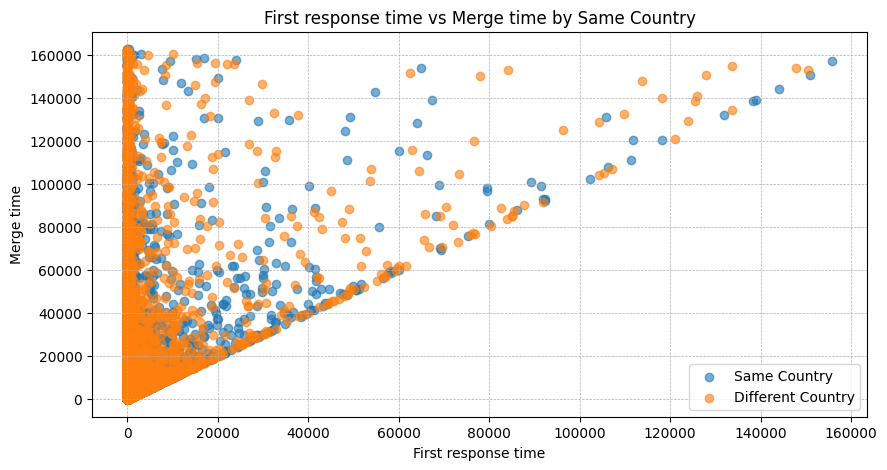

Kendall Tau correlation between first response time and merge time: tau = 0.16182134916784996, p = 2.2574048324415246e-178


In [47]:
plt.figure(figsize=(10, 5))
plt.hist(same_country['first_response_time'], bins=100, alpha=0.6, label='Same Country', log=True)
plt.hist(diff_country['first_response_time'], bins=100, alpha=0.6, label='Different Country', log=True)
plt.xlabel('First response time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time by Same Country')
plt.show()

same_country_sample = same_country['first_response_time'].dropna().sample(n=3, random_state=1)
diff_country_sample = diff_country['first_response_time'].dropna().sample(n=3,random_state=1)

res_same_country = shapiro(same_country_sample)
res_diff_country = shapiro(diff_country_sample)
print('Shapiro-Wilk test for same country, first response: W = {}, p = {}'.format(res_same_country.statistic, res_same_country.pvalue))
print('Shapiro-Wilk test for different country, first response: W = {}, p = {}'.format(res_diff_country.statistic, res_diff_country.pvalue))

H, p = kruskal(same_country['first_response_time'].dropna(), diff_country['first_response_time'].dropna())
print('Kruskal-Wallis H test, first response: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_country['first_response_time'].dropna(), diff_country['first_response_time'].dropna())
    print('Cliff\'s delta for first response: delta = {}, p = {}'.format(delta, res))

print('Mean first response time for same country: {}'.format(same_country['first_response_time'].mean()))
print('Mean first response time for different country: {}'.format(diff_country['first_response_time'].mean()))
print('Median first response time for same country: {}'.format(same_country['first_response_time'].median()))   
print('Median first response time for different country: {}'.format(diff_country['first_response_time'].median()))
print('Standard deviation of first response time for same country: {}'.format(same_country['first_response_time'].std()))
print('Standard deviation of first response time for different country: {}'.format(diff_country['first_response_time'].std()))
print('Maximum first response time for same country: {}'.format(same_country['first_response_time'].max()))
print('Maximum first response time for different country: {}'.format(diff_country['first_response_time'].max()))
print('Minimum first response time for same country: {}'.format(same_country['first_response_time'].min()))
print('Minimum first response time for different country: {}'.format(diff_country['first_response_time'].min()))

plt.figure(figsize=(10, 5))
plt.scatter(same_country['first_response_time'], same_country['mergetime_minutes'], alpha=0.6, label='Same Country')
plt.scatter(diff_country['first_response_time'], diff_country['mergetime_minutes'], alpha=0.6, label='Different Country')
plt.xlabel('First response time')
plt.ylabel('Merge time')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time vs Merge time by Same Country')
plt.show()

res = kendalltau(same_country['first_response_time'], same_country['mergetime_minutes'])
print('Kendall Tau correlation between first response time and merge time: tau = {}, p = {}'.format(res.correlation, res.pvalue))

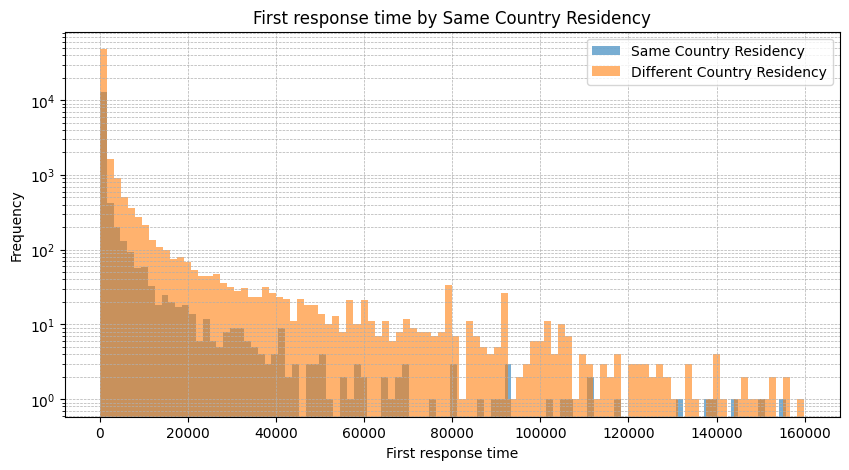

Shapiro-Wilk test for same country, first response: W = 0.7500000000000002, p = 7.771561172376096e-16
Shapiro-Wilk test for different country, first response: W = 0.9407529145222148, p = 0.5304091264677202
Kruskal-Wallis H test, first response: H = 529.5276736595437, p = 3.578541598277116e-117
Cliff's delta for first response: delta = 0.12445055052951574, p = negligible
Mean first response time for same country residency: 1072.091951582077
Mean first response time for different country residency: 1542.1159536708387
Median first response time for same country residency: 23.0
Median first response time for different country residency: 9.0
Standard deviation of first response time for same country residency: 5954.447371530162
Standard deviation of first response time for different country residency: 8264.063400832489
Maximum first response time for same country residency: 155744.0
Maximum first response time for different country residency: 159948.0
Minimum first response time for same co

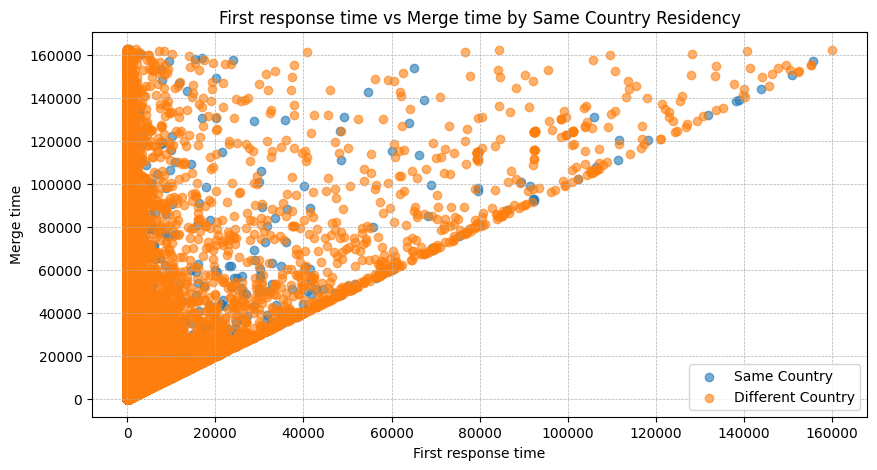

Kendall Tau correlation between first response time and merge time: tau = 0.16182134916784996, p = 2.2574048324415246e-178


In [48]:
same_country_res = merged_data[merged_data['contrib_country'] == merged_data['inte_country']]
diff_country_res = merged_data[merged_data['contrib_country'] != merged_data['inte_country']]
plt.figure(figsize=(10, 5))
plt.hist(same_country_res['first_response_time'], bins=100, alpha=0.6, label='Same Country Residency', log=True)
plt.hist(diff_country_res['first_response_time'], bins=100, alpha=0.6, label='Different Country Residency', log=True)
plt.xlabel('First response time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time by Same Country Residency')
plt.show()

same_country_sample = same_country_res['first_response_time'].dropna().sample(n=3, random_state=1)
diff_country_sample = diff_country_res['first_response_time'].dropna().sample(n=3,random_state=1)

res_same_country = shapiro(same_country_sample)
res_diff_country = shapiro(diff_country_sample)
print('Shapiro-Wilk test for same country, first response: W = {}, p = {}'.format(res_same_country.statistic, res_same_country.pvalue))
print('Shapiro-Wilk test for different country, first response: W = {}, p = {}'.format(res_diff_country.statistic, res_diff_country.pvalue))

H, p = kruskal(same_country_res['first_response_time'].dropna(), diff_country_res['first_response_time'].dropna())
print('Kruskal-Wallis H test, first response: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_country_res['first_response_time'].dropna(), diff_country_res['first_response_time'].dropna())
    print('Cliff\'s delta for first response: delta = {}, p = {}'.format(delta, res))

print('Mean first response time for same country residency: {}'.format(same_country_res['first_response_time'].mean()))
print('Mean first response time for different country residency: {}'.format(diff_country_res['first_response_time'].mean()))
print('Median first response time for same country residency: {}'.format(same_country_res['first_response_time'].median()))   
print('Median first response time for different country residency: {}'.format(diff_country_res['first_response_time'].median()))
print('Standard deviation of first response time for same country residency: {}'.format(same_country_res['first_response_time'].std()))
print('Standard deviation of first response time for different country residency: {}'.format(diff_country_res['first_response_time'].std()))
print('Maximum first response time for same country residency: {}'.format(same_country_res['first_response_time'].max()))
print('Maximum first response time for different country residency: {}'.format(diff_country_res['first_response_time'].max()))
print('Minimum first response time for same country residency: {}'.format(same_country_res['first_response_time'].min()))
print('Minimum first response time for different country residency: {}'.format(diff_country_res['first_response_time'].min()))

plt.figure(figsize=(10, 5))
plt.scatter(same_country_res['first_response_time'], same_country_res['mergetime_minutes'], alpha=0.6, label='Same Country')
plt.scatter(diff_country_res['first_response_time'], diff_country_res['mergetime_minutes'], alpha=0.6, label='Different Country')
plt.xlabel('First response time')
plt.ylabel('Merge time')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time vs Merge time by Same Country Residency')
plt.show()

res = kendalltau(same_country_res['first_response_time'], same_country_res['mergetime_minutes'])
print('Kendall Tau correlation between first response time and merge time: tau = {}, p = {}'.format(res.correlation, res.pvalue))

Shapiro-Wilk test for same country, negative emotion: W = 0.4799544650046612, p = 5.310464305736756e-81
Shapiro-Wilk test for same county, positive emotion: W = 0.690171594896447, p = 3.8357683477813164e-70
Shapiro-Wilk test for same country, neutral emotion: W = 0.82360339626558, p = 3.0661591536241416e-59
Shapiro-Wilk test for different country, negative emotion: W = 0.4950159477778727, p = 2.3053797125999427e-80
Shapiro-Wilk test for different country, positive emotion: W = 0.7890056645813257, p = 1.3260824263841782e-62
Shapiro-Wilk test for different country, neutral emotion: W = 0.8573100018505964, p = 2.2194746153178314e-55
Kruskal-Wallis H test, negative emotion: H = 6.124465685393284, p = 0.013332357757010561
Cliff's delta: -0.01748105737578249, interpretation: negligible
Kruskal-Wallis H test, positive emotion: H = 364.9090804918268, p = 2.402512192903643e-81
Cliff's delta: -0.16554348564588753, interpretation: small
Kruskal-Wallis H test, neutral emotion: H = 9.78364475634336

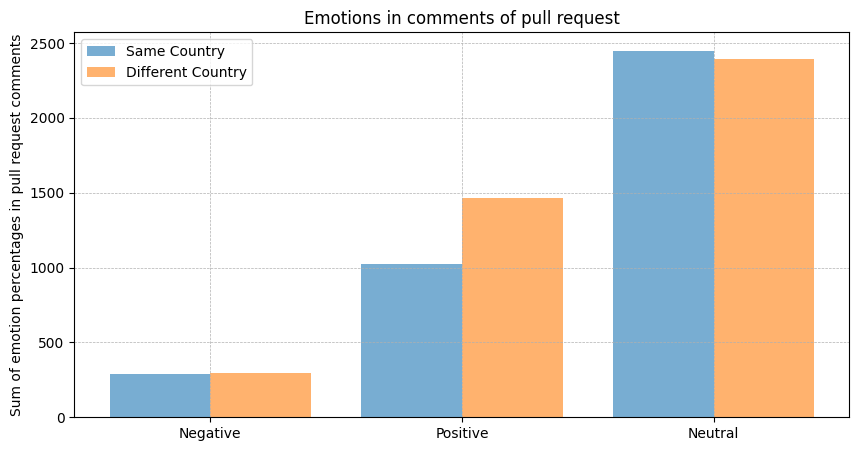

In [49]:
# emotion
neg_same = same_country['perc_neg_emotion'].dropna()
pos_same = same_country['perc_pos_emotion'].dropna()
neu_same = same_country['perc_neu_emotion'].dropna()

neg_diff = diff_country['perc_neg_emotion'].dropna()
pos_diff = diff_country['perc_pos_emotion'].dropna()
neu_diff = diff_country['perc_neu_emotion'].dropna()


sample_size = 5000
same_sample_neg = neg_same.sample(n=sample_size, random_state=1)
same_sample_pos = pos_same.sample(n=sample_size, random_state=1)
same_sample_neu = neu_same.sample(n=sample_size, random_state=1)

diff_sample_neg = neg_diff.sample(n=sample_size, random_state=1)
diff_sample_pos = pos_diff.sample(n=sample_size, random_state=1)
diff_sample_neu = neu_diff.sample(n=sample_size, random_state=1)

res_same_neg = shapiro(same_sample_neg)
res_same_pos = shapiro(same_sample_pos)
res_same_neu = shapiro(same_sample_neu)

print('Shapiro-Wilk test for same country, negative emotion: W = {}, p = {}'.format(res_same_neg.statistic, res_same_neg.pvalue))
print('Shapiro-Wilk test for same county, positive emotion: W = {}, p = {}'.format(res_same_pos.statistic, res_same_pos.pvalue))
print('Shapiro-Wilk test for same country, neutral emotion: W = {}, p = {}'.format(res_same_neu.statistic, res_same_neu.pvalue))

res_diff_neg = shapiro(diff_sample_neg)
res_diff_pos = shapiro(diff_sample_pos)
res_diff_neu = shapiro(diff_sample_neu)

print('Shapiro-Wilk test for different country, negative emotion: W = {}, p = {}'.format(res_diff_neg.statistic, res_diff_neg.pvalue))
print('Shapiro-Wilk test for different country, positive emotion: W = {}, p = {}'.format(res_diff_pos.statistic, res_diff_pos.pvalue))
print('Shapiro-Wilk test for different country, neutral emotion: W = {}, p = {}'.format(res_diff_neu.statistic, res_diff_neu.pvalue))

H, p = kruskal(neg_same, neg_diff)
print('Kruskal-Wallis H test, negative emotion: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neg_same, neg_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(pos_same, pos_diff)
print('Kruskal-Wallis H test, positive emotion: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(pos_same, pos_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(neu_same, neu_diff)
print('Kruskal-Wallis H test, neutral emotion: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neu_same, neu_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

plt.figure(figsize=(10, 5))
width = 0.4
categories = ['Negative', 'Positive', 'Neutral']
x = range(len(categories))
plt.bar(x, [same_sample_neg.sum(), same_sample_pos.sum(), same_sample_neu.sum()], width=width, alpha=0.6, label='Same Country')
plt.bar([p + width for p in x], [diff_sample_neg.sum(), diff_sample_pos.sum(), diff_sample_neu.sum()], width=width, alpha=0.6, label='Different Country')
plt.ylabel('Sum of emotion percentages in pull request comments')
plt.title('Emotions in comments of pull request')
plt.xticks([p + width / 2 for p in x], categories)
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Hypothesis 3

Now for our third hypothesis, we will test if pull requests to repositories with teams of many nationalities are merged faster.

- Pull requests to repositories with teams of many nationalities are merged faster.

number of different project ids: 13


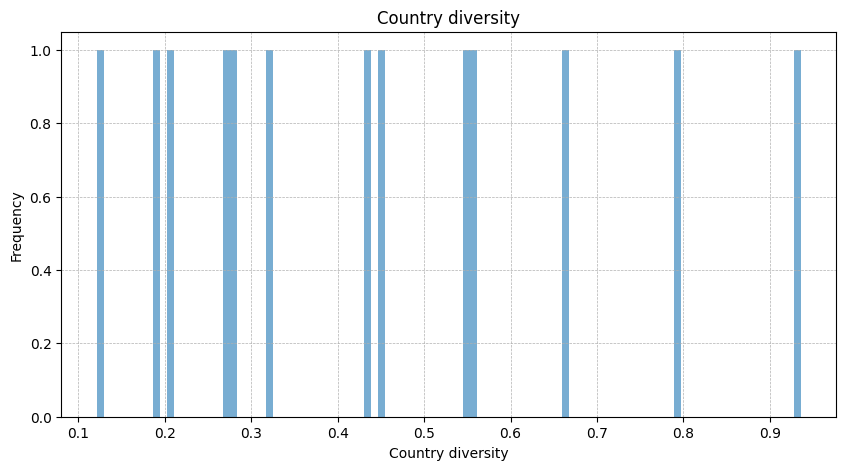

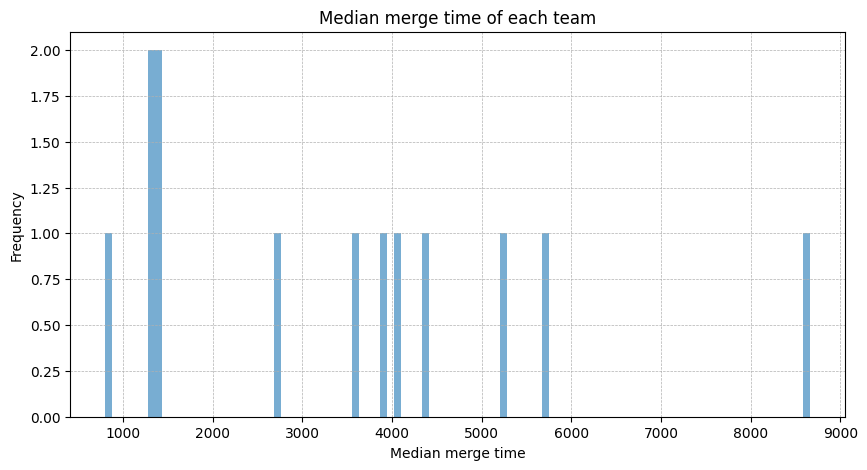

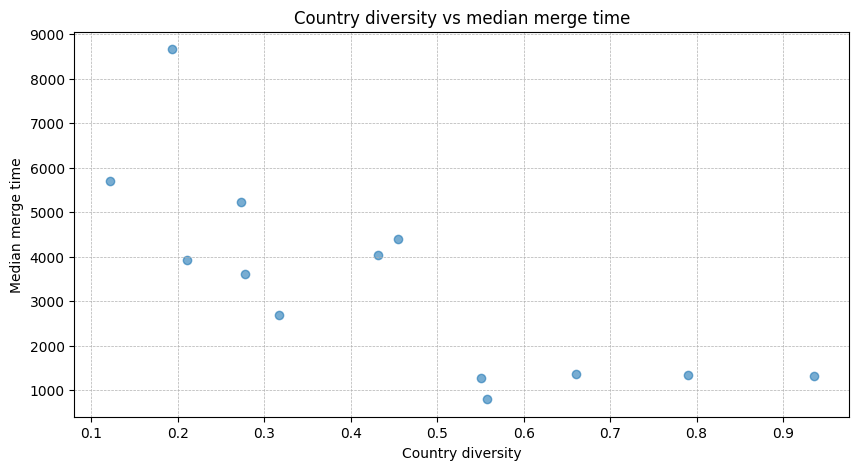

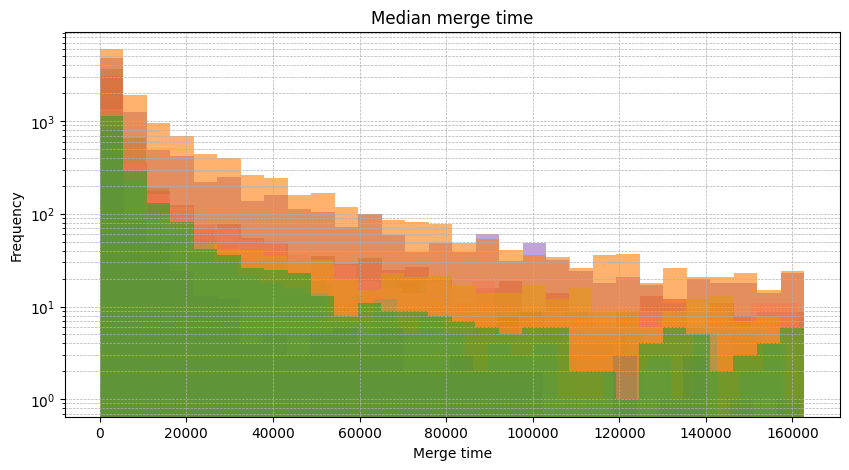

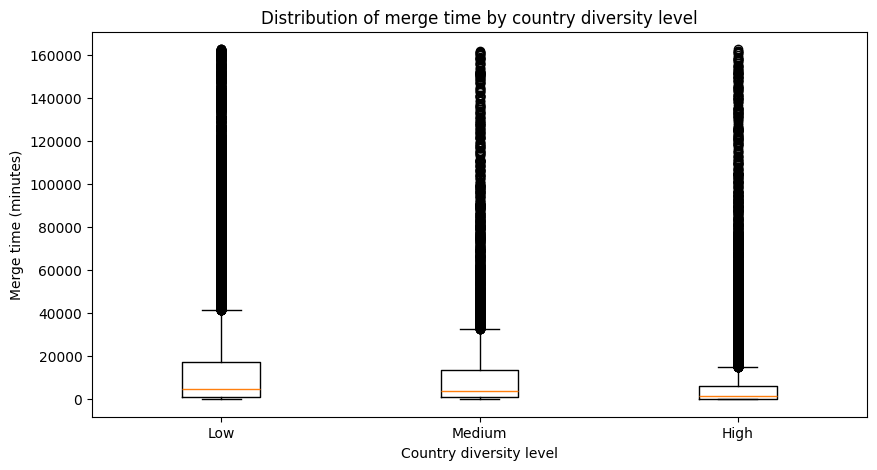

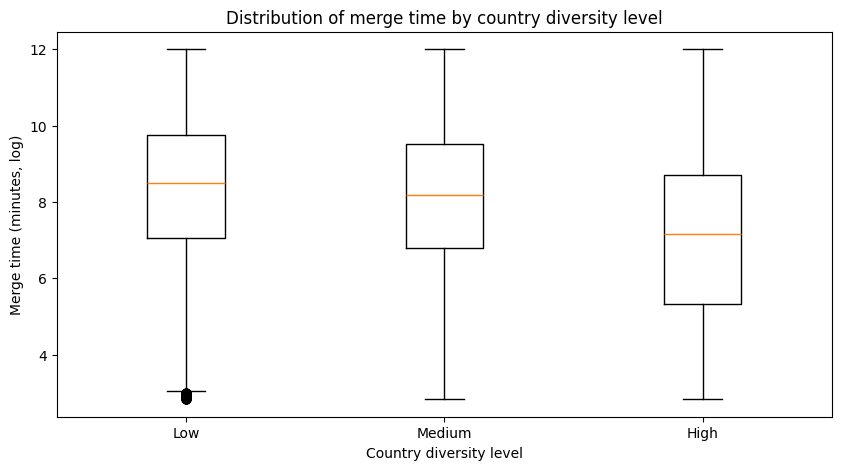

Kruskal-Wallis Test, low vs medium: Stat=88.09013568480358, P-value=6.253872837249006e-21
Cliff's Delta, low vs medium: Delta=0.07388385993595273, P-value=negligible
Kruskal-Wallis Test, low vs high: Stat=2632.0413547708777, P-value=0.0
Cliff's Delta, low vs high: Delta=0.3131669520655156, P-value=small
Kruskal-Wallis Test, medium vs high: Stat=815.8844648643842, P-value=1.8990420059041885e-179
Cliff's Delta, medium vs high: Delta=0.2442499317922929, P-value=small
Mean merge time for low diversity: 15930.904476559746
Mean merge time for medium diversity: 14158.468378576668
Mean merge time for high diversity: 8597.90755936388
Median merge time for low diversity: 4877.0
Median merge time for medium diversity: 3619.0
Median merge time for high diversity: 1293.0
Standard deviation of merge time for low diversity: 26989.676851529315
Standard deviation of merge time for medium diversity: 26278.819260678138
Standard deviation of merge time for high diversity: 20718.04136292461
Maximum merge t

In [50]:
core_team = merged_data[merged_data['core_member'] == 1]
print('number of different project ids: {}'.format(len(core_team['project_id'].unique())))
core_team_merge_time = core_team.groupby('project_id').agg({
    'contrib_country': 'nunique',
    'mergetime_minutes': 'median',
    'team_size': 'mean'
}).rename(columns={'contrib_country': 'country_diversity', 'mergetime_minutes': 'median_mergetime_minutes', 'team_size': 'avg_team_size'})
core_team_merge_time['relative_country_diversity'] = core_team_merge_time['country_diversity'] / core_team_merge_time['avg_team_size']
grouped = core_team.groupby('project_id')

plt.figure(figsize=(10, 5))
plt.hist(core_team_merge_time['relative_country_diversity'], bins=100, alpha=0.6)
plt.xlabel('Country diversity')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Country diversity')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(core_team_merge_time['median_mergetime_minutes'], bins=100, alpha=0.6)
plt.xlabel('Median merge time')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Median merge time of each team')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(core_team_merge_time['relative_country_diversity'], core_team_merge_time['median_mergetime_minutes'], alpha=0.6)
plt.xlabel('Country diversity')
plt.ylabel('Median merge time')
plt.title('Country diversity vs median merge time')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
for id, group in grouped:
    plt.hist(group['mergetime_minutes'], bins=30, alpha=0.6, log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Median merge time')
plt.show()


quantile_labels = ['Low', 'Medium', 'High']
core_team_merge_time['diversity_level'] = pd.qcut(core_team_merge_time['relative_country_diversity'], q=3, labels=quantile_labels)
core_team = core_team.merge(core_team_merge_time['diversity_level'], on='project_id', how='left')

times_low = core_team[core_team['diversity_level'] == 'Low']['mergetime_minutes']
times_medium = core_team[core_team['diversity_level'] == 'Medium']['mergetime_minutes']
times_high = core_team[core_team['diversity_level'] == 'High']['mergetime_minutes']

times_low_log = core_team[core_team['diversity_level'] == 'Low']['log_mergetime_minutes']
times_medium_log = core_team[core_team['diversity_level'] == 'Medium']['log_mergetime_minutes']
times_high_log = core_team[core_team['diversity_level'] == 'High']['log_mergetime_minutes']

plt.figure(figsize=(10, 5))
plt.boxplot([times_low, times_medium, times_high], data=core_team)
plt.xticks([1, 2, 3], quantile_labels)
plt.xlabel('Country diversity level')
plt.ylabel('Merge time (minutes)')
plt.title('Distribution of merge time by country diversity level')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot([times_low_log, times_medium_log, times_high_log], data=core_team)
plt.xticks([1, 2, 3], quantile_labels)
plt.xlabel('Country diversity level')
plt.ylabel('Merge time (minutes, log)')
plt.title('Distribution of merge time by country diversity level')
plt.show()

stat, p = kruskal(times_low, times_medium)
print(f"Kruskal-Wallis Test, low vs medium: Stat={stat}, P-value={p}")

if p < 0.05:
    delta, res = cliffs_delta(times_low, times_medium)
    print(f"Cliff's Delta, low vs medium: Delta={delta}, P-value={res}")

stat, p = kruskal(times_low, times_high)
print(f"Kruskal-Wallis Test, low vs high: Stat={stat}, P-value={p}")

if p < 0.05:
    delta, res = cliffs_delta(times_low, times_high)
    print(f"Cliff's Delta, low vs high: Delta={delta}, P-value={res}")

stat, p = kruskal(times_medium, times_high)
print(f"Kruskal-Wallis Test, medium vs high: Stat={stat}, P-value={p}")

if p < 0.05:
    delta, res = cliffs_delta(times_medium, times_high)
    print(f"Cliff's Delta, medium vs high: Delta={delta}, P-value={res}")

print('Mean merge time for low diversity: {}'.format(times_low.mean()))
print('Mean merge time for medium diversity: {}'.format(times_medium.mean()))
print('Mean merge time for high diversity: {}'.format(times_high.mean()))
print('Median merge time for low diversity: {}'.format(times_low.median()))
print('Median merge time for medium diversity: {}'.format(times_medium.median()))
print('Median merge time for high diversity: {}'.format(times_high.median()))
print('Standard deviation of merge time for low diversity: {}'.format(times_low.std()))
print('Standard deviation of merge time for medium diversity: {}'.format(times_medium.std()))
print('Standard deviation of merge time for high diversity: {}'.format(times_high.std()))
print('Maximum merge time for low diversity: {}'.format(times_low.max()))
print('Maximum merge time for medium diversity: {}'.format(times_medium.max()))
print('Maximum merge time for high diversity: {}'.format(times_high.max()))
print('Minimum merge time for low diversity: {}'.format(times_low.min()))
print('Minimum merge time for medium diversity: {}'.format(times_medium.min()))
print('Minimum merge time for high diversity: {}'.format(times_high.min()))